In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
URL = 'C:/Users/vokea/OneDrive/Рабочий стол/Mishin/ml-latest-small/water.csv'
df = pd.read_csv(URL, sep=',', names=['index', 'location', 'town', 'mortality', 'hardness'], skiprows=1)
del df['index']
df.head(2)

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   location   61 non-null     object
 1   town       61 non-null     object
 2   mortality  61 non-null     int64 
 3   hardness   61 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.0+ KB


In [73]:
df.describe().round(2)

,mortality,hardness
count,61.00,61.00
mean,1524.15,47.18
std,187.67,38.09
min,1096.00,5.00
25%,1379.00,14.00
50%,1555.00,39.00
75%,1668.00,75.00
max,1987.00,138.00


In [78]:
q1 = df['mortality'].quantile(0.25)
q3 = df['mortality'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
result = df[df['mortality'].between(lower_bound, upper_bound, inclusive=True)].sort_values('mortality')
result.head(2)

,location,town,mortality,hardness
25,South,Ipswich,1096,138
37,South,Oxford,1175,107


In [75]:
pd.concat([df, result]).drop_duplicates(keep=False)

,location,town,mortality,hardness


In [79]:
q1 = df['hardness'].quantile(0.25)
q3 = df['hardness'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
result = df[df['hardness'].between(lower_bound, upper_bound, inclusive=True)].sort_values('hardness')
result.head(2)

,location,town,mortality,hardness
2,South,Birmingham,1466,5
38,South,Plymouth,1486,5


In [80]:
pd.concat([df, result]).drop_duplicates(keep=False)

,location,town,mortality,hardness


### Корреляция

<AxesSubplot:xlabel='location', ylabel='mortality'>

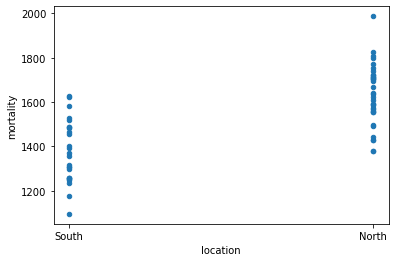

In [23]:
df.plot(kind='scatter', x='location', y='mortality') ## смертность по локациям

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

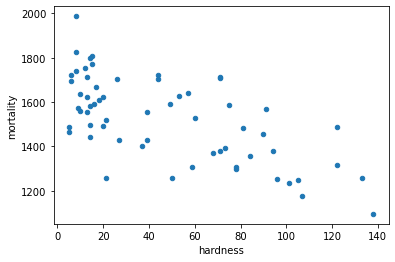

In [25]:
df.plot(kind='scatter', x='hardness', y='mortality') ## смертность и жесткость воды

In [26]:
df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [27]:
df[['hardness', 'mortality']].corr(method='spearman') ## K_spearman

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [28]:
df[['hardness', 'mortality']].corr(method='kendall') ## K_kendall

,hardness,mortality
hardness,1.000000,-0.453753
mortality,-0.453753,1.000000


<AxesSubplot:>

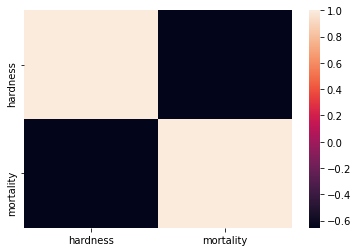

In [30]:
sns.heatmap(df[['hardness', 'mortality']].corr())

### Регрессия

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [33]:
X = df[['hardness']]
y = df['mortality']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [35]:
X_train.shape

(42, 1)

In [36]:
y_train.shape

(42,)

In [37]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [38]:
model.coef_

array([-3.13167087])

In [39]:
model.intercept_

1668.9722977277095

In [40]:
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [41]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

0.5046490611017092

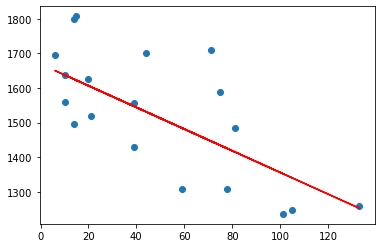

In [42]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [82]:
df_South = df.loc[df['location'] == 'South']
df_North = df.loc[df['location'] == 'North']
df_North['location'].unique()

array(['North'], dtype=object)

### Посчитаем регрессию по South

In [83]:
X = df_South[['hardness']]
y = df_South['mortality']

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

In [105]:
X_train.shape

(17, 1)

In [106]:
y_train.shape

(17,)

In [107]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [108]:
model.coef_

array([-1.14840369])

In [109]:
model.intercept_

1659.62147501213

In [110]:
y_pred = model.predict(X_test)
y_pred

array([1650.43424551, 1649.28584182, 1643.54382339, 1652.73105289,
       1641.24701601, 1578.0848132 , 1609.09171276, 1650.43424551,
       1614.8337312 , 1642.3954197 , 1614.8337312 , 1636.65340126,
       1640.09861232, 1642.3954197 , 1650.43424551, 1643.54382339,
       1648.13743814, 1551.67152838])

In [111]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

0.10998286635580612

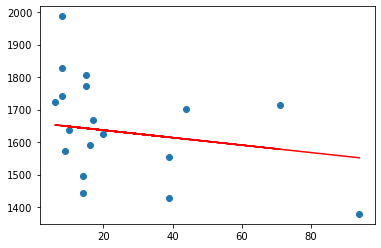

In [112]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

### Посчитаем регрессию по North

In [113]:
X = df_North[['hardness']]
y = df_North['mortality']

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

In [115]:
X_train.shape

(17, 1)

In [116]:
y_train.shape

(17,)

In [117]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [118]:
model.coef_

array([-1.14840369])

In [119]:
model.intercept_

1659.62147501213

In [120]:
y_pred = model.predict(X_test)
y_pred

array([1650.43424551, 1649.28584182, 1643.54382339, 1652.73105289,
       1641.24701601, 1578.0848132 , 1609.09171276, 1650.43424551,
       1614.8337312 , 1642.3954197 , 1614.8337312 , 1636.65340126,
       1640.09861232, 1642.3954197 , 1650.43424551, 1643.54382339,
       1648.13743814, 1551.67152838])

In [121]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

0.10998286635580612

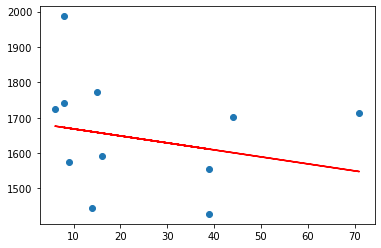

In [103]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')